# Introduction to data visualization with Matplotlib

In [1]:
#Libraries
import matplotlib.pyplot as plt
import pandas as pd

Here we create a figure with empty axes

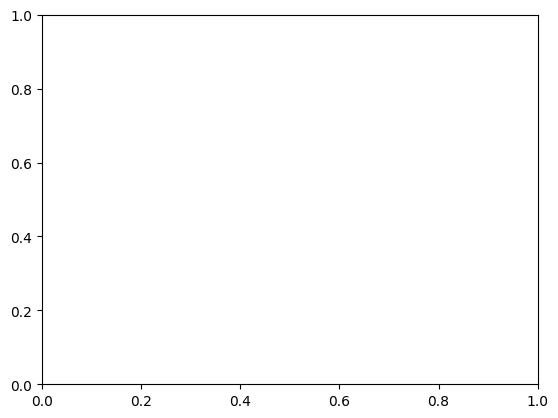

In [2]:
fig, ax = plt.subplots()
plt.show()

In [10]:
seattle_weather = pd.read_csv("databases/seattle_weather.csv")
seattle_weather

FileNotFoundError: [Errno 2] No such file or directory: 'databases/seattle_weather.csv'